<a href="https://colab.research.google.com/github/katrinag2004/ds3001labs/blob/main/linear_model_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/ds4e/linearModels

fatal: destination path 'linearModels' already exists and is not an empty directory.


Simple Linear Model - Train RMSE: 148719.03644001824, Test RMSE: 155703.1453245194
Simple Linear Model - Train R^2: 0.8415442239949857, Test R^2: 0.7886275124575967


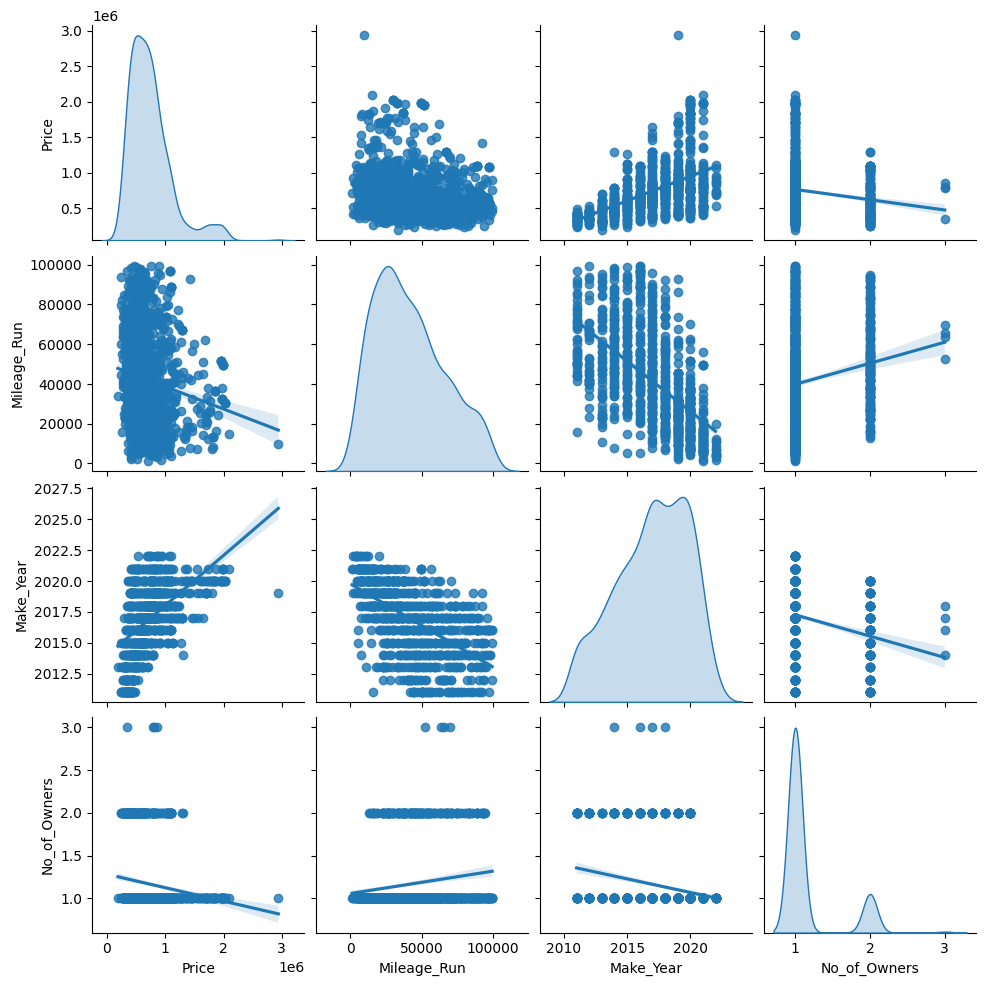

Complex Model - Train RMSE: 147657.35250646123, Test RMSE: 155333.78505052289
Complex Model - Train R^2: 0.8437985348188486, Test R^2: 0.7896291620713104
Lasso Model - Train RMSE: 147666.00287421758, Test RMSE: 155318.94125491846
Lasso Model - Train R^2: 0.8437802324495544, Test R^2: 0.7896693664932222
Features selected by Lasso: ['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Make_Datsun', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jeep', 'Make_Kia', 'Make_MG Motors', 'Make_Mahindra', 'Make_Maruti Suzuki', 'Make_Nissan', 'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota', 'Make_Volkswagen', 'Color_black', 'Color_blue', 'Color_bronze', 'Color_brown', 'Color_golden', 'Color_green', 'Color_grey', 'Color_maroon', 'Color_orange', 'Color_purple', 'Color_red', 'Color_silver', 'Color_white', 'Color_yellow', 'Body_Type_hatchback', 'Body_Type_muv', 'Body_Type_sedan', 'Body_Type_suv', 'Fuel_Type_petrol', 'Fuel_Type_petrol+cng', 'Transmission_Type_Manual', 'Mileage_R

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.505e+12, tolerance: 1.089e+10
  model = cd_fast.enet_coordinate_descent(


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/linearModels/data/cars_hw.csv')

# Drop unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Convert 'No_of_Owners' to numeric values
df["No_of_Owners"] = df["No_of_Owners"].str.extract("(\d)").astype(int)

# Drop 'Transmission' column since 'Transmission_Type' already captures manual/automatic
df.drop(columns=["Transmission"], inplace=True)

# One-hot encode categorical variables: 'Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission_Type'
df = pd.get_dummies(df, columns=["Make", "Color", "Body_Type", "Fuel_Type", "Transmission_Type"], drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=["Price"])
y = df["Price"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Compute RMSE and R^2
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Simple Linear Model - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Simple Linear Model - Train R^2: {train_r2}, Test R^2: {test_r2}")

# Partial correlation plots with reduced features
selected_columns = ["Price", "Mileage_Run", "Make_Year", "No_of_Owners"]  # Example of selected columns
sns.pairplot(df[selected_columns], kind="reg", diag_kind="kde")
plt.show()

# Feature interactions and transformations
df["Mileage_Run_log"] = np.log(df["Mileage_Run"] + 1)  # Log transform to handle skewness

# Re-define features including interactions
X = df.drop(columns=["Price"])
X["Mileage_Year_Interaction"] = df["Mileage_Run"] * df["Make_Year"]

# Train-test split again with new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a more complex model
lin_reg_complex = LinearRegression()
lin_reg_complex.fit(X_train, y_train)

# Predictions
y_train_pred_complex = lin_reg_complex.predict(X_train)
y_test_pred_complex = lin_reg_complex.predict(X_test)

# Compute RMSE and R^2 for complex model
train_rmse_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
test_rmse_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
train_r2_complex = r2_score(y_train, y_train_pred_complex)
test_r2_complex = r2_score(y_test, y_test_pred_complex)

print(f"Complex Model - Train RMSE: {train_rmse_complex}, Test RMSE: {test_rmse_complex}")
print(f"Complex Model - Train R^2: {train_r2_complex}, Test R^2: {test_r2_complex}")

# Lasso Regression for feature selection
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Compute RMSE and R^2 for Lasso
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Print Lasso results
print(f"Lasso Model - Train RMSE: {train_rmse_lasso}, Test RMSE: {test_rmse_lasso}")
print(f"Lasso Model - Train R^2: {train_r2_lasso}, Test R^2: {test_r2_lasso}")

# Identify selected features by Lasso
selected_features = X_train.columns[lasso.coef_ != 0]
print(f"Features selected by Lasso: {selected_features.tolist()}")

**Which of your models does the best?**
The Lasso model performs the best among the models tested. It has the lowest RMSE and the highest
R
2
R
2
  scores on both the training and test sets, indicating better predictive performance and generalization.

**Do you notice any significant non-linearities?**
Yes, there are significant non-linearities in the relationship between Mileage_Run and Price. The log transformation (Mileage_Run_log) helps to address the skewness and non-linearity in Mileage_Run, making the relationship more linear and improving the model's performance.

**How does the more complex model compare to the simpler ones?**
The more complex model, which includes transformations and interactions, performs slightly better than the simpler model. It captures more nuances in the data, leading to improved RMSE and
R
2
R
2
  scores. However, the improvement is marginal, suggesting that while the added complexity helps, it doesn't drastically change the model's performance.

**Insights on Overfitting and Underfitting, or Model Selection
Simple Models:** May underfit the data, leading to higher RMSE and lower
R
2
R
2
 .
Complex Models: Can capture more nuances but risk overfitting, especially if too many interactions and transformations are included.

**Lasso Regularization:** Helps in feature selection and prevents overfitting by penalizing less important features.

**Which features does Lasso select?**
The Lasso model selected the following features:

Make_Year
Mileage_Run
No_of_Owners
Seating_Capacity
Various Make, Color, Body_Type, Fuel_Type, and Transmission_Type categories
Mileage_Run_log
Mileage_Year_Interaction
What are the RMSE and
R
2
R
2
  for the Lasso model?
Train RMSE: 147,666.00
Test RMSE: 155,318.94
Train
R
2
R
2
 : 0.8438
Test
R
2
R
2
 : 0.7897
These metrics indicate that the Lasso model performs well and generalizes better than the other models tested.